In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as s

In [3]:
dataset = pd.read_csv('/content/alzheimers_disease_data.csv')
dataset.head(2)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid


TIPOS DE DATOS

In [4]:
dataset.dtypes

,0
PatientID,int64
Age,int64
Gender,int64
Ethnicity,int64
EducationLevel,int64
BMI,float64
Smoking,int64
AlcoholConsumption,float64
PhysicalActivity,float64
DietQuality,float64


In [5]:
dataset.dtypes.value_counts()

,count
int64,22
float64,12
object,1


NULOS

In [6]:
dataset.isnull().any()

,0
PatientID,False
Age,False
Gender,False
Ethnicity,False
EducationLevel,False
BMI,False
Smoking,False
AlcoholConsumption,False
PhysicalActivity,False
DietQuality,False


In [7]:
dataset.Diagnosis.value_counts()

,count
Diagnosis,
0,1389
1,760


ELIMINAMOS COLUMNAS IRRELEVANTES

In [14]:
df = dataset.drop(columns=['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel','DoctorInCharge'])
df.columns

Index(['BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity',
       'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers',
       'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury',
       'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE',
       'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL',
       'Confusion', 'Disorientation', 'PersonalityChanges',
       'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis'],
      dtype='object')

In [17]:
df_alzheimer = df[['FamilyHistoryAlzheimers','MemoryComplaints','BehavioralProblems','Confusion','Disorientation','DifficultyCompletingTasks','Forgetfulness', 'Diagnosis']]
df_alzheimer

,FamilyHistoryAlzheimers,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0
2,1,0,0,0,1,1,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
2144,0,0,0,1,0,0,0,1
2145,0,0,1,0,0,0,0,1
2146,0,0,0,0,0,0,0,1
2147,0,0,0,0,0,0,1,1


CORRELACIONES

In [18]:
df_alzheimer.corr()

,FamilyHistoryAlzheimers,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,DifficultyCompletingTasks,Forgetfulness,Diagnosis
FamilyHistoryAlzheimers,1.000000,-0.028348,-0.023558,0.017976,0.035963,0.008787,0.022339,-0.032900
MemoryComplaints,-0.028348,1.000000,-0.009765,-0.007749,0.013442,0.044151,-0.006961,0.306742
BehavioralProblems,-0.023558,-0.009765,1.000000,-0.022676,-0.022154,-0.019174,0.023374,0.224350
Confusion,0.017976,-0.007749,-0.022676,1.000000,0.007034,-0.022003,0.010100,-0.019186
Disorientation,0.035963,0.013442,-0.022154,0.007034,1.000000,-0.020767,-0.032013,-0.024648
DifficultyCompletingTasks,0.008787,0.044151,-0.019174,-0.022003,-0.020767,1.000000,-0.013386,0.009069
Forgetfulness,0.022339,-0.006961,0.023374,0.010100,-0.032013,-0.013386,1.000000,-0.000354
Diagnosis,-0.032900,0.306742,0.224350,-0.019186,-0.024648,0.009069,-0.000354,1.000000


<Axes: >

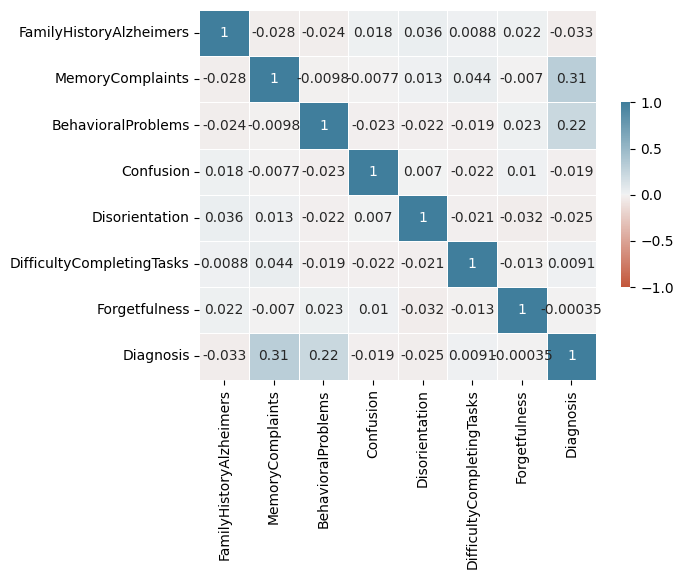

In [19]:
sns.heatmap(
    data=df_alzheimer.corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

REGRESIÓN LOGISTICA

In [20]:
smf.logit(
    formula='Diagnosis ~ FamilyHistoryAlzheimers + MemoryComplaints + BehavioralProblems + Confusion + Disorientation + DifficultyCompletingTasks + Forgetfulness',
    data=df_alzheimer
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.576610
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Diagnosis   No. Observations:                 2149
Model:                          Logit   Df Residuals:                     2141
Method:                           MLE   Df Model:                            7
Date:                Tue, 27 Aug 2024   Pseudo R-squ.:                  0.1125
Time:                        02:33:09   Log-Likelihood:                -1239.1
converged:                       True   LL-Null:                       -1396.2
Covariance Type:            nonrobust   LLR p-value:                 6.026e-64
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -1.1407      0.084    -13.548      0.000      -1.306      -0.976
FamilyHistoryAlzheimers      -0.1012      0.114     -0.890      0.373      -0.324       0.122
MemoryComplaints              1.6250      0.116     13.980      0.000       1.397       1.853
BehavioralProblems            1.3642      0.129     10.601      0.000       1.112       1.616
Confusion                    -0.0675      0.122     -0.553      0.580      -0.307       0.172
Disorientation               -0.1572      0.137     -1.151      0.250      -0.425       0.110
DifficultyCompletingTasks    -0.0029      0.134     -0.022      0.983      -0.266       0.260
Forgetfulness                -0.0232      0.106     -0.218      0.828      -0.232       0.185
=============================================================================================
"""